In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import seaborn as sns

conecuh = pd.read_csv('Conecuh.csv')
conecuh = conecuh.set_index('Year')
conecuh

,Flowcfs
Year,
1941,369
1942,683
1943,923
1944,1193
1945,413
1946,1025
1947,894
1948,859
1949,1157


#### (13) Test the null hypothesis that the median flow is 683 cfs. The alternate hypothesis is that is is less than 683, and alpha = 0.05

In [30]:
# 1) Choose the appropriate Test: this appears to be a sign test
# 2) Establish the null and alternate hypotheses. Null, median = 683. Alternate, median < 683 
# 3) Decide on an acceptable error rate α: 0.05
# 4) Compute the test statistic from the data: Observed number of minus differences in the dataset 
null_median = 683
alpha = 0.05
concecuh = conecuh[conecuh!=683]

differences = conecuh - null_median
test_stat = np.sum(differences < 0)
n_total = np.sum(differences !=0)
p_value = stats.binom.cdf(test_stat, n_total, 0.5)

print(f"Sample median: {np.median(conecuh):.2f}")
print(f"Total non-zero differences: {n_total}")
print(f"Test statistic: {test_stat}")
print(f"P-value", p_value)


if p_value < alpha:
    print("There is sufficient evidence to conclude that the median is less than 683 cfs.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not sufficient evidence to conclude that the median is less than 683 cfs.")



Sample median: 581.00
Total non-zero differences: Flowcfs    19
dtype: int64
Test statistic: Flowcfs    11
dtype: int64
P-value [0.82035828]
Fail to reject the null hypothesis.
There is not sufficient evidence to conclude that the median is less than 683 cfs.


/home/anna/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


### (14) Unit well yields, in gallons per minute per foot of water-bearing material, were contrasted for wells within valleys containing fracturing versus valleys with no fracturing (Wright, 1985). For the PPCC test for normality, r(with)=0.943 and r(without)=0.805. Perform the appropriate α = 0.05 test to discern whether fracturing is associated with higher mean unit well yield

In [43]:
# 1) Choose the appropriate Test: Rank-Sum test with large approximation, since n for both samples is > 10
# 2) Establish the null and alternate hypotheses. Null: u1 = u2. Alternate, u1 > u2. The two books states these differently. Hesel states these in terms of probability, but they are pretty much saying the same thing 
# 3) Decide on an acceptable error rate α: 0.05
# 4) Test Stat: Wilcoxon rank-sum test statistic 
yields_with = np.array([0.95, 0.72, 0.51, 0.44, 0.40, 0.30, 0.18, 0.16, 0.16, 0.13, 0.086, 0.031, 0.020])
yields_without =np.array([1.02, 0.49, 0.454, 0.10, 0.077, 0.041, 0.040, 0.030, 0.020, 0.007, 0.003, 0.001])

statistic, p_value = stats.mannwhitneyu(yields_with, yields_without, alternative='greater')
print('Test Statistic is:', statistic)
print('P Value is', p_value)
if p_value < 0.05:
    print('Reject the null. The means are not equal, fracturing is associated with a higher mean unit well yield ')

Test Statistic is: 112.5
P Value is 0.0321518820119779
Reject the null. The means are not equal, fracturing is associated with a higher mean unit well yield 


#### (15)

#### (A) State the appropriate null and alternate hypotheses to see if conductance values are the same in the two forks

#### H0: μ (South Fork) − μ (North Fork) = 0.
#### H1: μ (South Fork) − μ (North Fork) ≠ 0.

#### (B) Determine whether a parametric or nonparametric test should be used

In [85]:
river_df = pd.DataFrame({'South Fork': [194, 348, 383, 225, 266, 194, 212, 320, 340, 310], 'North Fork': [255, 353, 470, 353, 353, 295, 199, 410, 346, 405]})

In [86]:
differences = river_df['South Fork'] - river_df['North Fork']

<Axes: >

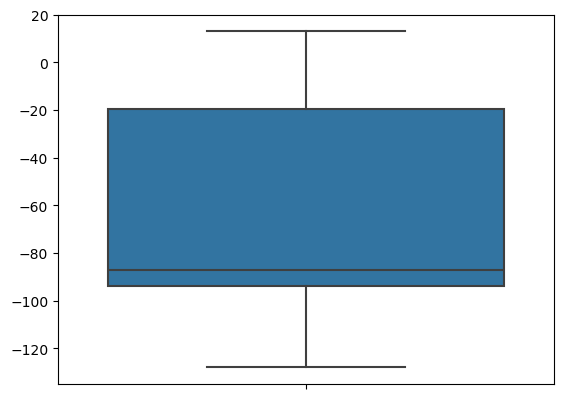

In [87]:
sns.boxplot(y=differences)

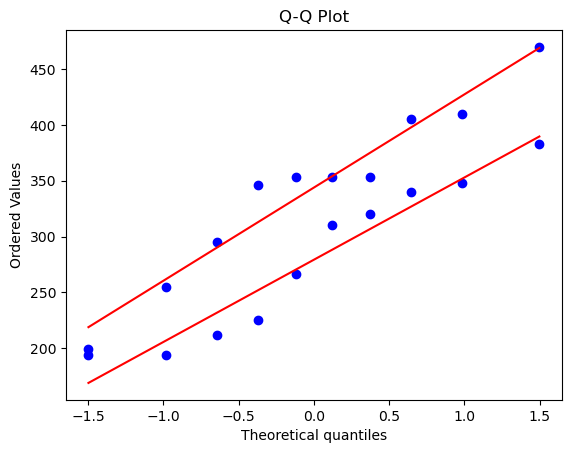

In [88]:
stats.probplot(river_df['South Fork'], dist="norm", plot=plt)
stats.probplot(river_df['North Fork'], dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

#### Because the Median is in the middle of the box, and the whiskers are roughly semetrical (less so on the second plot), we can assume normality. Additionally, there are no major outliers. Therefore, we can use a parametric test. 

#### QQplots looks fine

#### (C) Compute an alpha = 0.05 test and report the results

In [100]:
# We are looking for the difference between two means with variances unknown and not assumed equal. 
south_fork = np.array(river_df['South Fork'].values)
north_fork = np.array(river_df['North Fork'].values)
t_stat, p_value = stats.ttest_rel(south_fork, north_fork)
print('P value is:',p_value)
print('Test statistic is:', t_stat)
print('reject the null. There is a difference between the means')

P value is: 0.002168316552919229
Test statistic is: -4.241865565060234
reject the null. There is a difference between the means


#### (D) Illustrate and check the results with a plot

/home/anna/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anna/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/anna/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: >

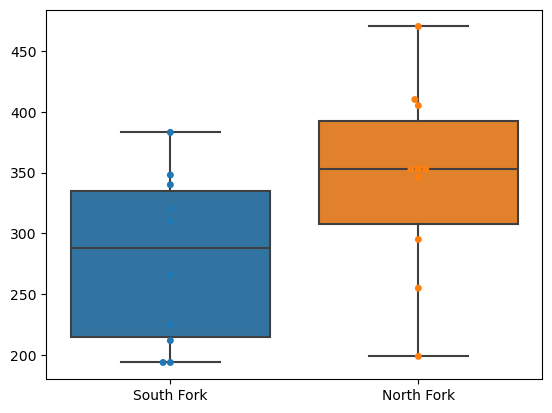

In [102]:
sns.boxplot(data=river_df)
sns.swarmplot(data=river_df)

/home/anna/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of difference distribution. x=0 is no change')

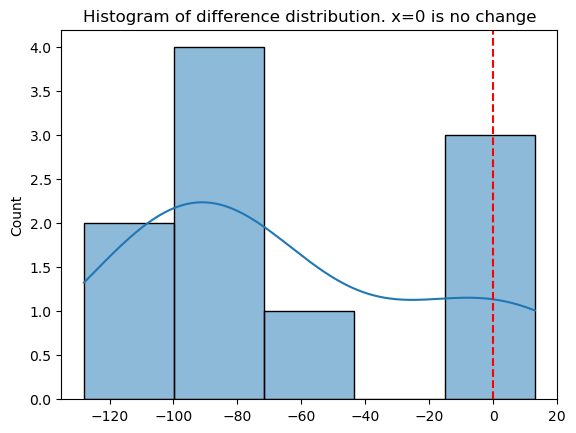

In [107]:
sns.histplot(differences, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Histogram of difference distribution. x=0 is no change')

#### These plots show the differences between south fork and north fork distrubtions 

### (E) Estimate the amount by which the forks differ in conductance

In [108]:
mean = differences.mean()
mean

-64.7